In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset= pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
dataset.shape

(541909, 8)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
dataset.duplicated().sum()

5268

In [6]:
#Removing/droppping redundant values -It will not affect as our total dataset is very large.
dataset.drop_duplicates(inplace = True)
print('New dataset shape after dropping duplicate values: {}'.format(dataset.shape))

New dataset shape after dropping duplicate values: (536641, 8)


In [7]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [8]:
#Removing all rows with null values, it will not going to affect our dataset.
dataset = dataset.drop(index=dataset[dataset['CustomerID'].isnull()].index)
print('New dataset shape after dropping null values as well: {}'.format(dataset.shape))

New dataset shape after dropping null values as well: (401604, 8)


In [9]:
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
print('No of unique values in Invoice no: {}'.format(dataset.InvoiceNo.unique().size))
print('No of unique values in Stock Code: {}'.format(dataset.StockCode.unique().size))
print('No of unique values in Description: {}'.format(dataset.Description.unique().size))
print('No of unique values in Quantity: {}'.format(dataset.Quantity.unique().size))
print('No of unique values in Invoive Date: {}'.format(dataset.InvoiceDate.unique().size))
print('No of unique values in Unit price: {}'.format(dataset.UnitPrice.unique().size))
print('No of unique values in CustomerID: {}'.format(dataset.CustomerID.unique().size))
print('No of unique values in Country: {}'.format(dataset.Country.unique().size))

No of unique values in Invoice no: 22190
No of unique values in Stock Code: 3684
No of unique values in Description: 3896
No of unique values in Quantity: 436
No of unique values in Invoive Date: 20460
No of unique values in Unit price: 620
No of unique values in CustomerID: 4372
No of unique values in Country: 37


In [11]:
#need to increase dimensions to perform good pca so adding one more column in our dataset.
dataset['TotalPrice'] = dataset['Quantity'] * dataset['UnitPrice']

In [12]:
#adding 4 more columns of day, month, hour, year.
# dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['Month'] = dataset['InvoiceDate'].dt.month
dataset['Day'] = dataset['InvoiceDate'].dt.day
dataset['Hour'] = dataset['InvoiceDate'].dt.hour
dataset['Year'] = dataset['InvoiceDate'].dt.year

dataset.drop(columns = ['InvoiceDate'], axis=1, inplace=True)     #dropping InvoiveDate column
dataset.shape

(401604, 12)

In [13]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Hour,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,12,1,8,2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,12,1,8,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,12,1,8,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,12,1,8,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,12,1,8,2010


In [14]:
# removing un-necessary columns
dataset.drop(columns=['InvoiceNo', 'CustomerID'], axis=1, inplace=True)
dataset.head()

,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,Month,Day,Hour,Year
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,12,1,8,2010
1,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,12,1,8,2010
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,12,1,8,2010
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,12,1,8,2010
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,12,1,8,2010


In [15]:
dataset.shape

(401604, 10)

In [20]:
dataset['Description']=dataset['Description'].astype(str)
dataset['StockCode']=dataset['StockCode'].astype(str)
dataset['Country']=dataset['Country'].astype(str)

In [21]:
#performing label encoding to encode categorical variables.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Country']= encoder.fit_transform(dataset['Country'])
dataset['Description']= encoder.fit_transform(dataset['Description'])
dataset['StockCode']= encoder.fit_transform(dataset['StockCode'])

In [18]:
dataset.head()

,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,Month,Day,Hour,Year
0,3249,3716,6,2.55,35,15.30,12,1,8,2010
1,2649,3724,6,3.39,35,20.34,12,1,8,2010
2,2855,861,8,2.75,35,22.00,12,1,8,2010
3,2803,1813,6,3.39,35,20.34,12,1,8,2010
4,2802,2776,6,3.39,35,20.34,12,1,8,2010


###b) Reducing the dimensionality of the dataset using PCA so as to retain atleast 85 percent of the explained variance.

In [22]:
from sklearn.decomposition import PCA
model_pca = PCA(n_components=0.85)
transformed_pca = model_pca.fit_transform(dataset)

In [23]:
print('Shape after PCA is done: {}'.format(transformed_pca.shape))

Shape after PCA is done: (401604, 2)


In [24]:
type(transformed_pca)

numpy.ndarray

In [25]:
#converting it to pandas dataframe
dataset_pca = pd.DataFrame(transformed_pca, columns = ['col1', 'col2'])
dataset_pca.head()

,col1,col2
0,1414.291238,-504.895180
1,846.799608,-855.506267
2,1410.275638,-1350.207612
3,-97.063454,1053.900283
4,451.631624,136.460850


###c)  Determining the optimum number of clusters for the technique of k-Means clustering using elbow method and WCSS (Within Cluster Sum of Squares) as the metric.

In [26]:
#determining the optimum number of clusters
from sklearn.cluster import KMeans
tmp=[]

for i in range(1,15): 
  kmeans = KMeans(n_clusters=i)
  kmeans.fit_predict(dataset_pca)
  tmp.append(kmeans.inertia_)


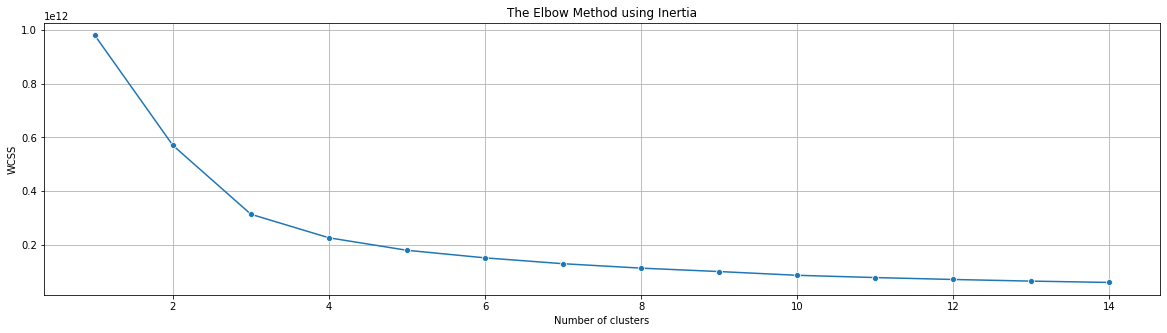

In [27]:
plt.figure(figsize=(20, 5))
sns.lineplot(range(1,15), tmp, marker ='o')
plt.title('The Elbow Method using Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

###d) Create k-Means model using the optimum number of clusters obtained above. Visualize the clusters.

In [28]:
kmeans_model = KMeans(n_clusters=3, random_state=0) 
kmeans_model.fit(dataset_pca)
label = kmeans_model.predict(dataset_pca)

In [29]:
np.unique(label)

array([0, 1, 2], dtype=int32)

In [30]:
# standardizing the components
std_scaler = StandardScaler()
data_standardise = std_scaler.fit_transform(dataset_pca)
dataset_std = pd.DataFrame(data_standardise, columns = dataset_pca.columns)
dataset_std['Cluster'] = label
dataset_std.head()

,col1,col2,Cluster
0,1.233465,-0.475522,2
1,0.738531,-0.805736,1
2,1.229963,-1.271658,1
3,-0.084653,0.992588,0
4,0.393888,0.128522,2


In [31]:
colors = ['#852390', '#2095DF', '#009821']
dataset_std['c'] = dataset_std.Cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})
dataset_std.head()

,col1,col2,Cluster,c
0,1.233465,-0.475522,2,#009821
1,0.738531,-0.805736,1,#2095DF
2,1.229963,-1.271658,1,#2095DF
3,-0.084653,0.992588,0,#852390
4,0.393888,0.128522,2,#009821


###e) Visualise the clusters wrt to 2 pca components.

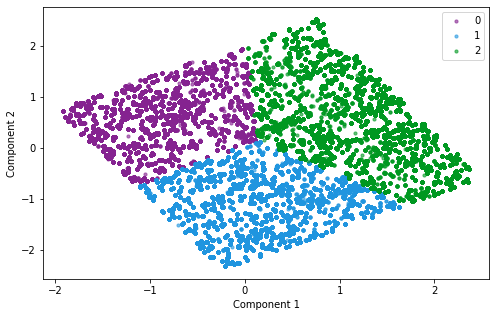

In [32]:
# visualizing the clusters

cdict = {0: '#852390', 1: '#2095DF', 2: '#009821'}

fig, ax = plt.subplots(figsize=(8, 5))
for g in [0, 1, 2]:
  comp1 = dataset_std[dataset_std['Cluster']==g]['col1']
  comp2 = dataset_std[dataset_std['Cluster']==g]['col2']
  plt.scatter(comp1, comp2, c = cdict[g], alpha = 0.6, s=10, label = g)

ax.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()